# **Librerias**

In [63]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d
from scipy import integrate, linalg
import pylab as plt
import math as math

%matplotlib inline

# **Segunda Evaluación Física Computacional 1 (2021-1)**



(5 de Abril de 2021)

Se pide resolver numéricamente la ecuación diferencial de un [oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal](https://en.wikipedia.org/wiki/Harmonic_oscillator#Sinusoidal_driving_force), con ayuda de la función *odeint* de *scipy.integrate*.

La ecuación diferencial del oscilador amortiguado es

\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}

y $\zeta$ es la tasa de amortiguamiento dado por la expresión

\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}

siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire. 

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$). 

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:


* Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar. 
* Críticamente amortiguado ($\zeta = 1$).
* Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente. 
* Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular. 



## **Problema 1**



Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$: 

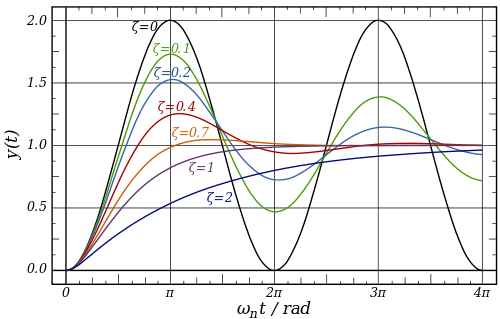

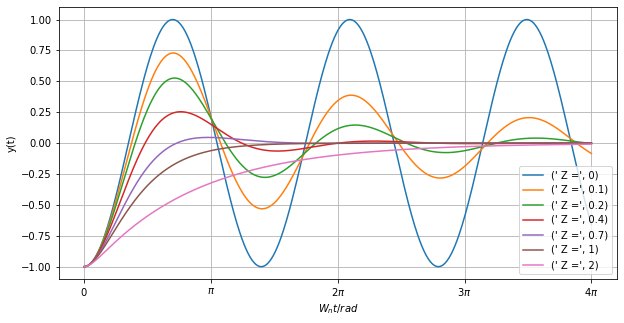

In [64]:
# Solución Problema1

# Definimos valores iniciales

M = 1         # Masa
K = 9         # Constante del resorte
Wn = 3        # Constante del resorte

abserr = 1.0e-8
relerr = 1.0e-6

# Definimos un vector: X[0]= x , X[1]= v

def dX_dt(X, t=1):
    return np.array([ X[1] , - 2*Z*Wn*X[1] - (Wn**2)*X[0]])

# Puntos críticos
X_f0 = np.array([     0. ,     0.])
all(dX_dt(X_f0) == np.zeros(2) )

# Solución númerica

t = np.linspace( 0, 4*np.pi, 500 )
A = (Wn * t)/(2*np.pi)
X0 = np.array([-1, 0])                     # Condiciones iniciales
plt.figure(figsize=(10, 5));

for Z in [0 , 0.1, 0.2, 0.4, 0.7, 1, 2]:

  X, infodict = integrate.odeint(dX_dt, X0, A, full_output=True
                                 , atol=abserr, rtol=relerr)
  x, y = X.T 
  plt.plot(t, x, label=(" Z =", Z));


plt.grid();
plt.legend(loc='best');
plt.xlabel('$W_nt / rad$');
plt.ylabel('y(t)');
plt.xticks([0,np.pi,2*np.pi,3*np.pi,4*np.pi],[r'$0$',r'$\pi$',r'$2\pi$',r'$3\pi$',r'$4\pi$'])
plt.show();

## **Problema 2**

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$). 

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

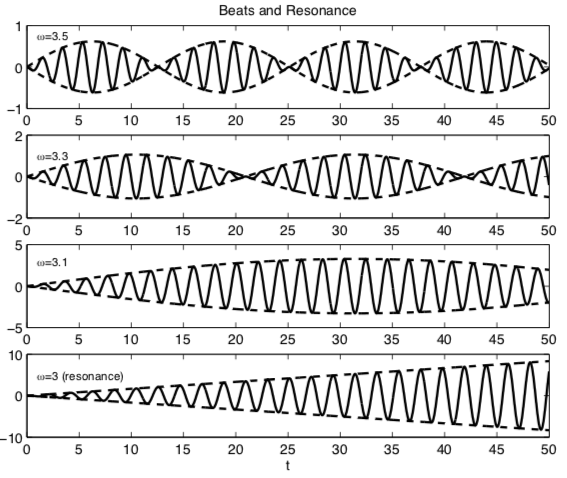

\
$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = 0
\end{equation*}$$ \\

$$\begin{equation*}
\frac{d x}{d t} = v \\
\frac{d v}{d t} =\frac{1}{m } F_0 \sin(\omega t)  - \omega_n^2 x 
\end{equation*}$$

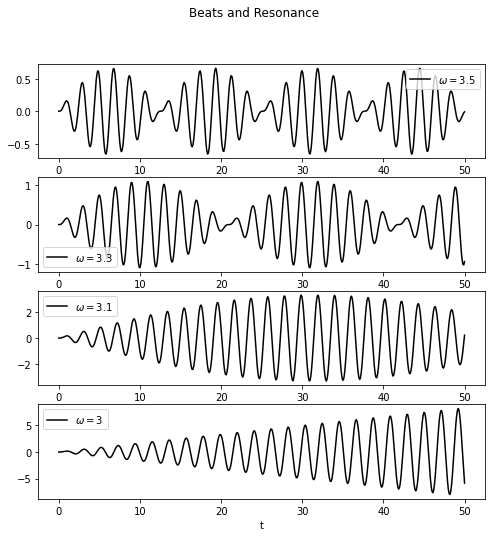

In [65]:
# Solución Problema 2

# Valores iniciales

F0 = 1          # Forzamiento
M = 1           # Masa
K = 9           # Constante del resorte
Wn = 3          # Frecuencia angular

# Frecuencias
fqs = [3.5, 3.3, 3.1, 3]

t = np.linspace( 0, 50, 500 )

# Solución numérica
X0 = np.array([0, 0])

fig,axs=plt.subplots(4)
fig.suptitle('Beats and Resonance')
fig.set_size_inches(8,8)
for W,n in zip(fqs,range(4)):

# Definimos un vector X: X[0]= x , X[1]= v

  def dX_dt(X, t=1):
      return np.array([ X[1] , (1/M)*F0*math.sin(W*t) - (Wn**2)*X[0]])

  X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
  x, y = X.T

  axs[n].plot(t, x,color='k', label='$\omega=$'+str(W))
  axs[n].legend(loc='best')
plt.xlabel('t')
plt.show()

## **Problema 3**



Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$. 

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado. 



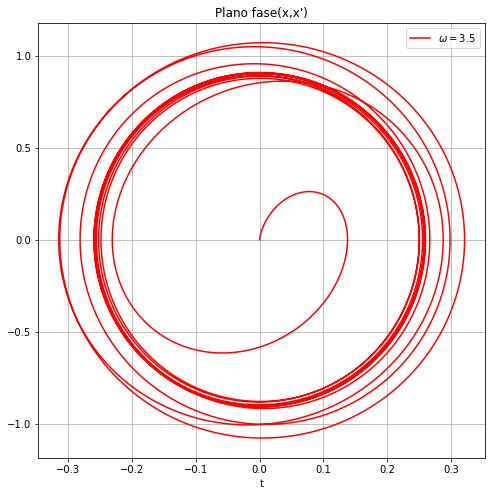

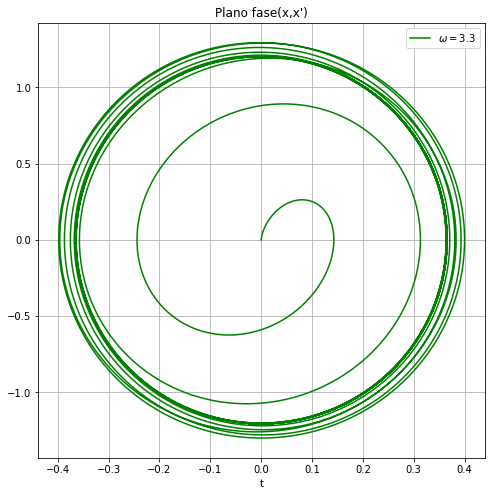

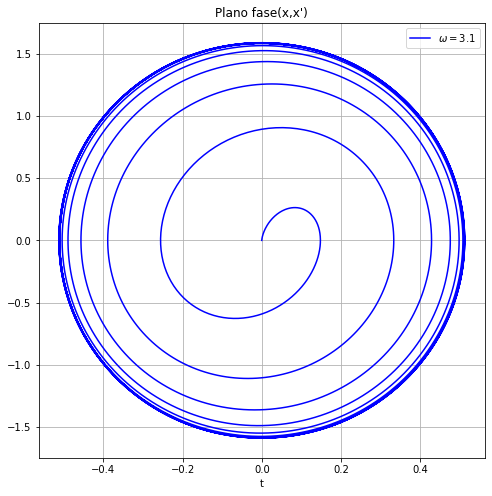

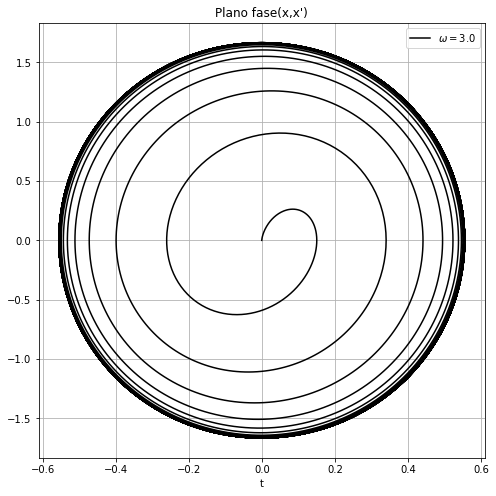

In [93]:
# Valores Iniciales

F0 = 1          # Forzamiento
M = 1           # Masa
K = 9           # Constante del resorte
Z = 0.1         # Coeficiente de amortiguamiento
Wn = 3          # Frecuencia angular

# Frecuencias
fqs = [3.5,3.3,3.1,3.0]

# Colores
colors = ['r','g','b','k','blue']

# Función
def f(y,t,W,Wn):
    x, x1 = y
    x2 = -(Wn**2)*x-2*Z*Wn*x1+np.sin(W*t)
    return(x1,x2)
t=np.linspace(0,50,5000)

# Condiciones iniciales
t0 = 0
y0 = [0.,0.]

# Gráfica
for W,C in zip(fqs, colors):
  plt.figure(figsize=(8,8))
  x=odeint(f,y0,t,args=(W,Wn))
  print()
  plt.plot(x[:,0],x[:,1] ,C, label='$\omega=$'+str(W))
  plt.legend(loc='best')
  plt.title("Plano fase(x,x')")
  plt.xlabel('t')
  plt.grid()
  plt.show()
